Task:
1) Scraped the information of the recently concluded Lok Sabha election from https://results.eci.gov.in 
2) Build a report of 10 key insight that I can derive from the data.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


In [2]:

# Step 1: Fetch the Main Page
main_url = "https://results.eci.gov.in/"
response = requests.get(main_url)
response.raise_for_status()  # Checking that the request was successful

# Parsing the main page content with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')


In [3]:

# Step 2: Locating the link to the results page
results_link = None
for link in soup.find_all('a', href=True):
    if 'PcResultGenJune2024' in link['href']:
        results_link = link['href']
        break

# If the results link is found, navigate to it
if results_link:
    results_url = results_link  # Directly assign the full URL from results_link
else:
    raise ValueError("Couldn't find the link to the results page. Please check the main page.")


In [4]:

# Step 3: Fetching the Results Page
response = requests.get(results_url)
response.raise_for_status()  # Check that the request was successful

# Parsing the results page content with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')


In [5]:

# Step 4: Locating the Table and Extract Data
table = soup.find('table', class_='table')

# Checking if the table was found
if table is None:
    raise ValueError("Couldn't find the table in the results page. Please check the URL or the HTML structure.")

# Extracting headers
headers = [header.text.strip() for header in table.find('thead').find_all('th')]

# Extracting rows
rows = []
for row in table.find('tbody').find_all('tr'):
    cells = row.find_all('td')
    row_data = [cell.text.strip() for cell in cells]
    rows.append(row_data)

# Creating a DataFrame
df = pd.DataFrame(rows, columns=headers)


In [12]:

# Step 5: Saving the DataFrame to a CSV file
df.to_csv('election_results.csv', index=False)
print("Data successfully scraped and saved to election_results.csv")


Data successfully scraped and saved to election_results.csv


In [17]:
# Loading the CSV file into a DataFrame
df = pd.read_csv('election_results.csv')



Total Seats Won by Each Party:
                                                Party  Won
0                                  AJSU Party - AJSUP    1
1                              Aam Aadmi Party - AAAP    3
2              Aazad Samaj Party (Kanshi Ram) - ASPKR    1
3      All India Majlis-E-Ittehadul Muslimeen - AIMIM    1
4                 All India Trinamool Congress - AITC   29
5                          Apna Dal (Soneylal) - ADAL    1
6                            Asom Gana Parishad - AGP    1
7                   Bharat Adivasi Party - BHRTADVSIP    1
8                        Bharatiya Janata Party - BJP  240
9        Communist Party of India  (Marxist) - CPI(M)    4
10  Communist Party of India  (Marxist-Leninist)  ...    2
11                     Communist Party of India - CPI    2
12                    Dravida Munnetra Kazhagam - DMK   22
13            Hindustani Awam Morcha (Secular) - HAMS    1
14                                  Independent - IND    7
15                     I

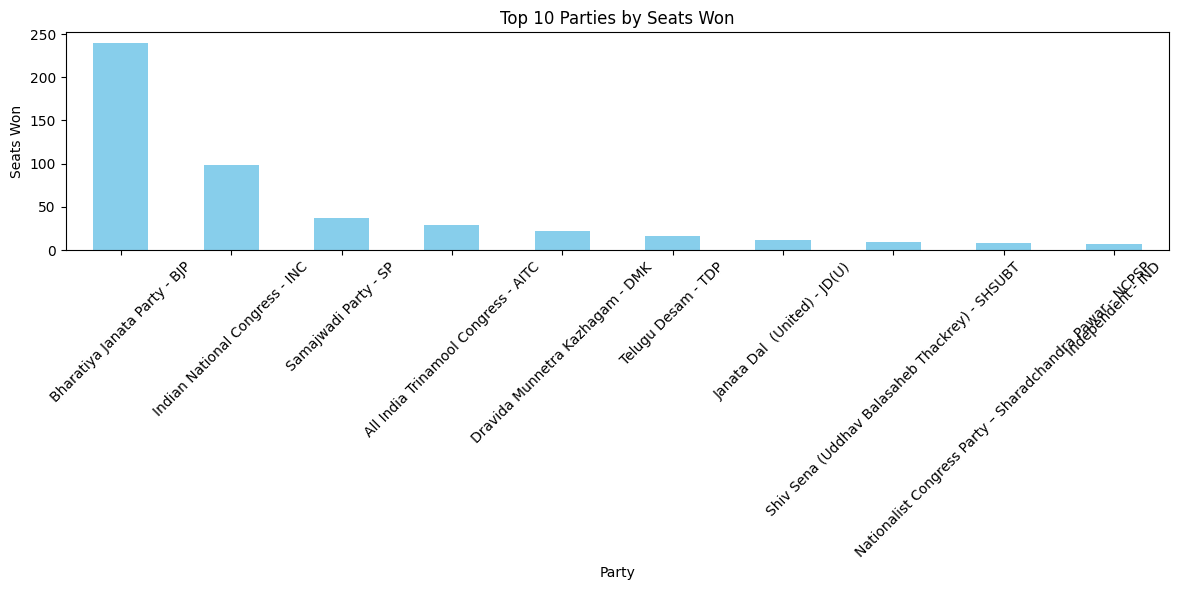


Parties with the most seats won:
                                                Party  Won
8                        Bharatiya Janata Party - BJP  240
15                     Indian National Congress - INC   99
31                               Samajwadi Party - SP   37
4                 All India Trinamool Congress - AITC   29
12                    Dravida Munnetra Kazhagam - DMK   22
36                                 Telugu Desam - TDP   16
20                       Janata Dal  (United) - JD(U)   12
33     Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT    9
26  Nationalist Congress Party – Sharadchandra Paw...    8
34                                    Shiv Sena - SHS    7


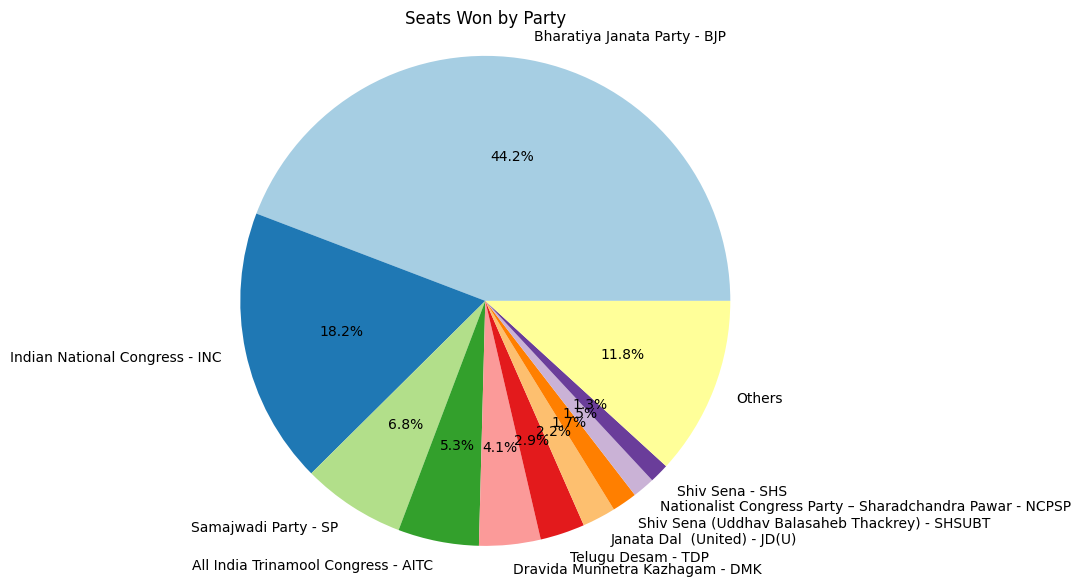


Number of Parties Participated: 42

Total Seats Won vs. Leading:
                                 Party  Won  Leading  Total
0         Bharatiya Janata Party - BJP  240        0    240
1       Indian National Congress - INC   99        0     99
2                 Samajwadi Party - SP   37        0     37
3  All India Trinamool Congress - AITC   29        0     29
4      Dravida Munnetra Kazhagam - DMK   22        0     22

Percentage of Total Seats Won by Each Party:
                                                Party  Won  Percentage
0                                  AJSU Party - AJSUP    1    0.184162
1                              Aam Aadmi Party - AAAP    3    0.552486
2              Aazad Samaj Party (Kanshi Ram) - ASPKR    1    0.184162
3      All India Majlis-E-Ittehadul Muslimeen - AIMIM    1    0.184162
4                 All India Trinamool Congress - AITC   29    5.340700
5                          Apna Dal (Soneylal) - ADAL    1    0.184162
6                            As

In [18]:

# Step 6: Generating Insights

# Total Seats Won by Each Party
total_seats = df.groupby('Party')['Won'].sum().reset_index()
print("\nTotal Seats Won by Each Party:")
print(total_seats)

# Top 10 Parties by Seats Won (Bar Chart)
top_parties = df.groupby('Party')['Won'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_parties.plot(kind='bar', color='skyblue')
plt.title('Top 10 Parties by Seats Won')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Printing parties with the most seats won
print("\nParties with the most seats won:")
print(total_seats.sort_values(by='Won', ascending=False).head(10))

# Creating a pie chart for the top 10 parties
top_n = 10
sorted_seats = total_seats.sort_values(by='Won', ascending=False)
if len(sorted_seats) > top_n:
    others = sorted_seats[top_n:].sum(numeric_only=True)
    others['Party'] = 'Others'
    sorted_seats = pd.concat([sorted_seats[:top_n], pd.DataFrame([others])], ignore_index=True)

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(sorted_seats['Won'], labels=sorted_seats['Party'], autopct='%1.1f%%', colors=plt.cm.Paired(range(len(sorted_seats))))
plt.title('Seats Won by Party')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Number of Parties Participated
num_parties = df['Party'].nunique()
print(f"\nNumber of Parties Participated: {num_parties}")

# Total Seats Won vs. Leading (if any)
df['Total'] = df['Won'] + df['Leading']
total_vs_leading = df[['Party', 'Won', 'Leading', 'Total']]
print("\nTotal Seats Won vs. Leading:")
print(total_vs_leading.head())

# Percentage of Total Seats Won by Each Party
total_seats['Percentage'] = (total_seats['Won'] / total_seats['Won'].sum()) * 100
print("\nPercentage of Total Seats Won by Each Party:")
print(total_seats)

# Top Parties Winning More than 10 Seats
top_winning_parties = total_seats[total_seats['Won'] > 10]
print("\nTop Parties Winning More than 10 Seats:")
print(top_winning_parties)

# Parties with Minimal Representation
minimal_representation = total_seats[total_seats['Won'] <= 5]
print("\nParties with Minimal Representation (5 or fewer seats):")
print(minimal_representation)

# Independent Candidates Performance
independent_performance = df[df['Party'].str.contains('Independent', case=False, na=False)]
print("\nIndependent Candidates Performance:")
print(independent_performance)

# Overall Summary of Results
summary = {
    'Total Seats': df['Won'].sum(),
    'Total Parties': num_parties,
    'Top Party': total_seats.iloc[0]['Party'],
    'Top Party Seats': total_seats.iloc[0]['Won']
}
print("\nOverall Summary of Results:")
print(summary)
